In [1]:
#!pip install --upgrade altair

#!pip install vega vega_datasets

In [2]:
#import altair as alt
#alt.renderers.enable('html')

In [3]:
# Set a seed value
seed_value = 999 
# 1. Initialise `PYTHONHASHSEED` environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Initialise Python's own pseudo-random generator
import random
random.seed(seed_value)
# 3. Initialise Numpy's pseudo-random generator
import numpy as np
np.random.seed(seed_value)

In [4]:
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#from plotly import __version__
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from pprint import pprint


#from yellowbrick.features import RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.model_selection as model_selection

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
#import pydot 


from random import sample

from sklearn import preprocessing

from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.model_selection as model_selection

from sklearn import tree
#import pydotplus
print(__doc__)

Automatically created module for IPython interactive environment


In [5]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [6]:
type(df.columns)

pandas.core.indexes.base.Index

In [7]:
df.shape

(1080, 82)

In [8]:
df.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

# Data Prepartion

In [9]:
print("Missing values")
print(df.isnull().sum())

Missing values
MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64


In [10]:
#Replace missing values to zero
df.replace(np.nan, 0, inplace=True)

In [11]:
print("Missing values")
print(df.isnull().sum())

Missing values
MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64


In [12]:
df.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [13]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


# Task 2.1 Data Exploration

Descriptive statistics and graphs (if appropriate). 

In [14]:
df.describe(include = np.number)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.424627,0.615388,0.318202,2.290888,3.833256,0.232520,0.181341,3.527284,0.211983,1.424713,...,0.226676,0.126770,0.099200,0.121521,0.121952,0.446073,0.141341,0.147525,0.154080,1.337784
std,0.250022,0.253382,0.052098,0.367300,0.953532,0.043351,0.028652,1.306709,0.034413,0.472284,...,0.028989,0.068206,0.063907,0.014276,0.040506,0.066432,0.083302,0.081074,0.101151,0.317126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.155869,0.000000,0.000000,0.067254,0.000000,0.258626,0.000000,0.000000,0.000000,0.586479
25%,0.287847,0.472764,0.287112,2.056486,3.149320,0.205530,0.164411,2.471432,0.190489,1.202789,...,0.206395,0.121498,0.000000,0.110839,0.110337,0.398082,0.110493,0.136712,0.076340,1.081423
50%,0.366125,0.565494,0.316462,2.295648,3.738908,0.231082,0.182270,3.325505,0.210560,1.355423,...,0.224000,0.145587,0.119377,0.121626,0.124534,0.448459,0.144696,0.164866,0.174236,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.241655,0.167584,0.139331,0.131955,0.142427,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [15]:
df.describe(include=np.object)

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,18899_4,Control,Memantine,S/C,c-SC-m
freq,1,570,570,555,150


# Target feature

In [16]:
df_class = df['class'].value_counts()
df_class.index
df_class.values

array([150, 150, 135, 135, 135, 135, 135, 105], dtype=int64)

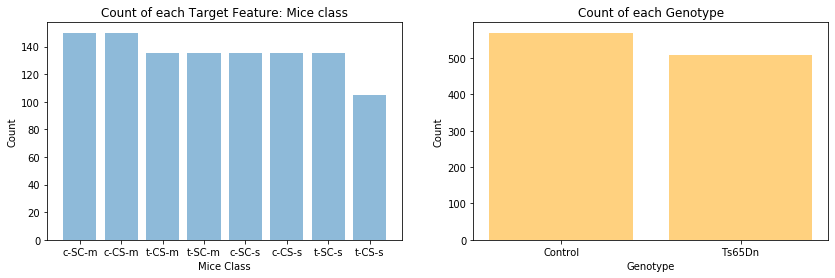

<Figure size 432x288 with 0 Axes>

In [17]:
fig, axes = plt.subplots(ncols=2,figsize=(14, 4))
ax1, ax2 = axes

#Plot 1
objects = df_class.index
y_pos = np.arange(len(objects))
performance = df_class.values


ax1.bar(y_pos, performance, align='center', alpha=0.5)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(df_class.index)
ax1.set_ylabel('Count')
ax1.set_xlabel('Mice Class')
ax1.set_title('Count of each Target Feature: Mice class')
#ax1.grid(color='#95a5a6', linewidth=.8, axis='y', alpha=0.3)

#Plot2
#Genotype feature
df_genotype = df['Genotype'].value_counts()
objects2 = df_genotype.index
y_pos2 = np.arange(len(objects2))
performance2 = df_genotype.values

ax2.bar(y_pos2, performance2, align='center', alpha=0.5, color='orange')
ax2.set_xticks(y_pos2)
ax2.set_xticklabels(df_genotype.index)
ax2.set_ylabel('Count')
ax2.set_xlabel('Genotype')
ax2.set_title('Count of each Genotype')
#plt.grid(color='#95a5a6', linewidth=.8, axis='y', alpha=0.3)

f = plt.gcf()
plt.show()
plt.draw()
f.savefig('target.pdf', dpi =100)

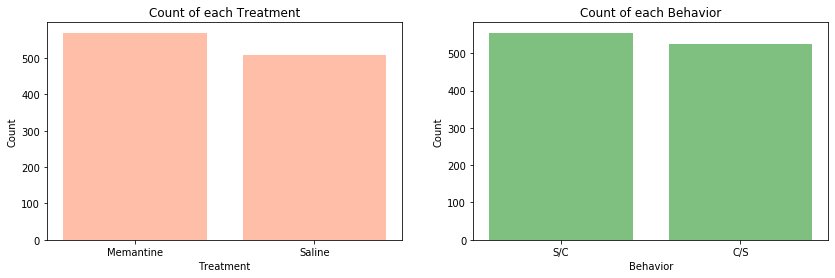

<Figure size 432x288 with 0 Axes>

In [18]:
fig, axes = plt.subplots(ncols=2,figsize=(14, 4))
ax1, ax2 = axes

#Plot 1
#Treatment feature
df_treatment = df['Treatment'].value_counts()
objects = df_treatment.index
y_pos = np.arange(len(objects))
performance = df_treatment.values


ax1.bar(y_pos, performance, align='center', alpha=0.5, color='coral')
ax1.set_xticks(y_pos)
ax1.set_xticklabels(df_treatment.index)
ax1.set_ylabel('Count')
ax1.set_xlabel('Treatment')
ax1.set_title('Count of each Treatment')
#ax1.grid(color='#95a5a6', linewidth=.8, axis='y', alpha=0.3)

#Plot2
#Behavior feature
df_behavior = df['Behavior'].value_counts()
objects2 = df_behavior.index
y_pos2 = np.arange(len(objects2))
performance2 = df_behavior.values

ax2.bar(y_pos2, performance2, align='center', alpha=0.5, color='green')
ax2.set_xticks(y_pos2)
ax2.set_xticklabels(df_behavior.index)
ax2.set_ylabel('Count')
ax2.set_xlabel('Behavior')
ax2.set_title('Count of each Behavior')
#plt.grid(color='#95a5a6', linewidth=.8, axis='y', alpha=0.3)

f = plt.gcf()
plt.show()
plt.draw()
f.savefig('target.pdf', dpi =100)

# Numerical Feature

In [19]:
numerical_cols = df.iloc[:, 1:78]
numerical_cols.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.0,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.0,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.0,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.0,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.0,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [20]:
mean_summary = numerical_cols.mean()
mean_summary = pd.DataFrame({'Mean values':mean_summary}).sort_values(by = 'Mean values', ascending = False) 
mean_summary.head(10)

,Mean values
NR2A_N,3.833256
pCAMKII_N,3.527284
ERK_N,2.467618
NR1_N,2.290888
PSD95_N,2.235236
Bcatenin_N,2.110774
pPKCG_N,1.706599
pNR2B_N,1.557627
pCASP9_N,1.548348
pPKCAB_N,1.521101


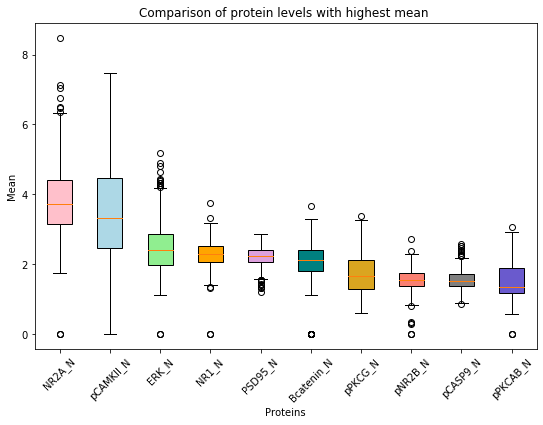

In [21]:
## combine these different collections into a list    
data_to_plot = [df.loc[:,'NR2A_N'], df.loc[:,'pCAMKII_N'],  df.loc[:,'ERK_N'],  df.loc[:,'NR1_N'],  df.loc[:,'PSD95_N'],
                df.loc[:,'Bcatenin_N'], df.loc[:,'pPKCG_N'], df.loc[:,'pNR2B_N'], df.loc[:,'pCASP9_N'], df.loc[:,'pPKCAB_N']]
 

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot,patch_artist=True)

#Set labels
ax.set_xticklabels(['NR2A_N', 'pCAMKII_N', 'ERK_N', 'NR1_N',  'PSD95_N',
                   'Bcatenin_N', 'pPKCG_N', 'pNR2B_N','pCASP9_N','pPKCAB_N'],rotation=45)

ax.set_title('Comparison of protein levels with highest mean ')
ax.set_xlabel('Proteins')
ax.set_ylabel('Mean')

colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'plum', 'teal', 'goldenrod', 'salmon', 'grey', 'slateblue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [22]:
mean_summary = numerical_cols.mean()
mean_summary = pd.DataFrame({'Mean values':mean_summary}).sort_values(by = 'Mean values', ascending = True) 
lowest_mean = mean_summary.head(10)
lowest_mean

,Mean values
BCL2_N,0.099200
GFAP_N,0.120889
ARC_N,0.121521
pS6_N,0.121521
pCFOS_N,0.121952
GluR4_N,0.126560
BAD_N,0.126770
H3AcK18_N,0.141341
EGR1_N,0.147525
H3MeK4_N,0.154080


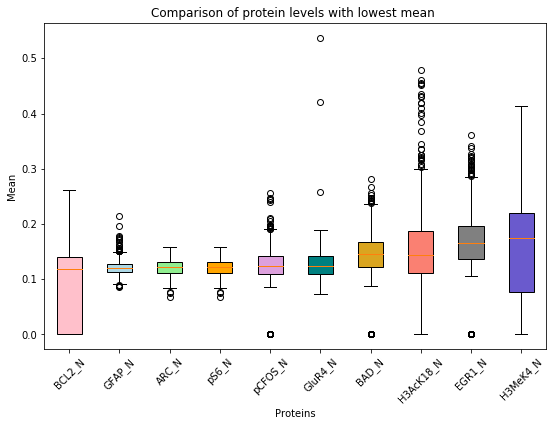

In [23]:
## combine these different collections into a list    
data_to_plot = [df.loc[:,'BCL2_N'], df.loc[:,'GFAP_N'],  df.loc[:,'ARC_N'],  df.loc[:,'pS6_N'],  df.loc[:,'pCFOS_N'],
                df.loc[:,'GluR4_N'], df.loc[:,'BAD_N'], df.loc[:,'H3AcK18_N'], df.loc[:,'EGR1_N'], df.loc[:,'H3MeK4_N']]
            
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot,patch_artist=True)

#Set labels
ax.set_xticklabels(lowest_mean.index,rotation=45)

ax.set_title('Comparison of protein levels with lowest mean ')
ax.set_xlabel('Proteins')
ax.set_ylabel('Mean')

colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'plum', 'teal', 'goldenrod', 'salmon', 'grey', 'slateblue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)


# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

# Highest STD

In [24]:
std_summary = numerical_cols.std()
std_summary = pd.DataFrame({'Standard Dev values':std_summary}).sort_values(by = 'Standard Dev values', ascending = False) 
highest_std = std_summary.head(10)
highest_std

,Standard Dev values
pCAMKII_N,1.306709
NR2A_N,0.953532
ERK_N,0.665370
pPKCG_N,0.578442
Bcatenin_N,0.512141
pPKCAB_N,0.487768
pELK_N,0.472284
NR1_N,0.367300
ELK_N,0.365318
ADARB1_N,0.361743


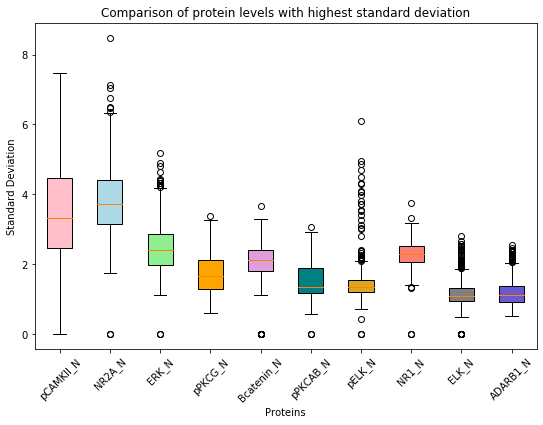

In [25]:
## combine these different collections into a list    
data_to_plot = [df.loc[:,'pCAMKII_N'], df.loc[:,'NR2A_N'],  df.loc[:,'ERK_N'],  df.loc[:,'pPKCG_N'],  df.loc[:,'Bcatenin_N'],
                df.loc[:,'pPKCAB_N'], df.loc[:,'pELK_N'], df.loc[:,'NR1_N'], df.loc[:,'ELK_N'], df.loc[:,'ADARB1_N']]
            
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot,patch_artist=True)

#Set labels
ax.set_xticklabels(highest_std.index,rotation=45)

ax.set_title('Comparison of protein levels with highest standard deviation')
ax.set_xlabel('Proteins')
ax.set_ylabel('Standard Deviation')

colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'plum', 'teal', 'goldenrod', 'salmon', 'grey', 'slateblue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)


# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

# Lowest STD

In [26]:
std_summary = numerical_cols.std()
std_summary = pd.DataFrame({'Standard Dev values':std_summary}).sort_values(by = 'Standard Dev values', ascending = True) 
lowest_std = std_summary.head(10)
lowest_std

,Standard Dev values
GFAP_N,0.013233
ARC_N,0.014276
pS6_N,0.014276
ERBB4_N,0.015071
BAX_N,0.018826
pGSK3B_N,0.019308
SNCA_N,0.024150
nNOS_N,0.024919
GluR4_N,0.026885
CREB_N,0.027996


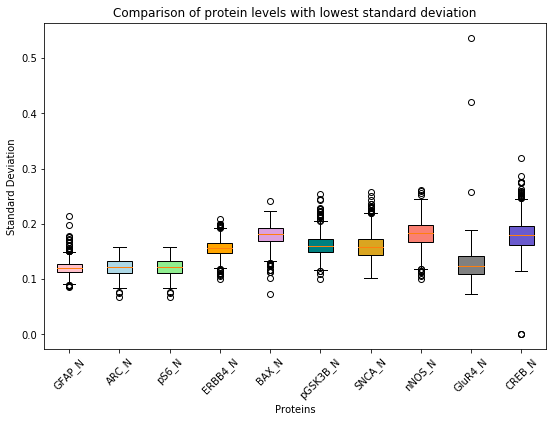

In [27]:
## combine these different collections into a list    
data_to_plot = [df.loc[:,'GFAP_N'], df.loc[:,'ARC_N'],  df.loc[:,'pS6_N'],  df.loc[:,'ERBB4_N'],  df.loc[:,'BAX_N'],
                df.loc[:,'pGSK3B_N'], df.loc[:,'SNCA_N'], df.loc[:,'nNOS_N'], df.loc[:,'GluR4_N'], df.loc[:,'CREB_N']]
            
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot,patch_artist=True)

#Set labels
ax.set_xticklabels(lowest_std.index,rotation=45)

ax.set_title('Comparison of protein levels with lowest standard deviation')
ax.set_xlabel('Proteins')
ax.set_ylabel('Standard Deviation')

colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'plum', 'teal', 'goldenrod', 'salmon', 'grey', 'slateblue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)



# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

# Task 2.2 Show relationship Data Exploration

## Descriptive Features

In [28]:
target = df['class']
df = df.drop(['MouseID', 'class'], axis=1)

In [29]:
from sklearn import preprocessing  #For heat map purpose only

le = preprocessing.LabelEncoder()
le_fit = le.fit(target)
target_encoded_le = le_fit.transform(target)
#print(np.unique(target_encoded_le, return_counts = True))
target_encoded_le  = pd.DataFrame({'class':target_encoded_le})
target_encoded_le.head()

,class
0,0
1,0
2,0
3,0
4,0


In [30]:
target_encoded_le['class'].value_counts()

2    150
0    150
7    135
6    135
4    135
3    135
1    135
5    105
Name: class, dtype: int64

In [31]:
target.value_counts()

c-SC-m    150
c-CS-m    150
t-CS-m    135
t-SC-m    135
c-SC-s    135
c-CS-s    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [32]:
numerical_cols_target = numerical_cols.join(target_encoded_le) #join target feature
numerical_cols_target.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,0.0,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,0.0,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,0.0,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,0.0,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,0.0,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0


In [33]:
numerical_cols_target.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'class'],
      dtype='object')

In [34]:
X = numerical_cols_target

Y = pd.DataFrame(numerical_cols_target['class'])

In [35]:
pearson_corr = numerical_cols_target.corrwith(numerical_cols_target['class'],axis=0, method='pearson')
dfpearson_corr = pd.DataFrame(pearson_corr).reset_index()

In [36]:
from scipy.stats import pearsonr
for colY in Y.columns:
    for colX in X.columns:
    #print('Pearson Correlation')
        corr, _ = pearsonr(numerical_cols_target[colX], numerical_cols_target[colY])
        alpha = 0.05
        print('Pearson Correlation', (alpha, corr))
        if corr <= alpha:
            print(colX +' and ' +colY+ ' two ariables are not correlated ')
        else:
            print(colX +' and ' +colY+ ' two variables are highly correlated ')
        print('\n')
    print('\n')

Pearson Correlation (0.05, -0.14517644865395882)
DYRK1A_N and class two ariables are not correlated 


Pearson Correlation (0.05, -0.062399975847563884)
ITSN1_N and class two ariables are not correlated 


Pearson Correlation (0.05, -0.10777063135449733)
BDNF_N and class two ariables are not correlated 


Pearson Correlation (0.05, -0.11127260641997011)
NR1_N and class two ariables are not correlated 


Pearson Correlation (0.05, -0.20055782668553754)
NR2A_N and class two ariables are not correlated 


Pearson Correlation (0.05, 0.17042577887983648)
pAKT_N and class two variables are highly correlated 


Pearson Correlation (0.05, 0.07390086572389493)
pBRAF_N and class two variables are highly correlated 


Pearson Correlation (0.05, 0.1788021693452042)
pCAMKII_N and class two variables are highly correlated 


Pearson Correlation (0.05, 0.22675820708392258)
pCREB_N and class two variables are highly correlated 


Pearson Correlation (0.05, -0.16200459851252938)
pELK_N and class two ar

In [37]:
corr_df = pd.DataFrame(columns=['Dependent Variables:\n Protein', 'Independet Variable','Correlation'])#, 'is_correlated'])
corr_df = corr_df.append(pd.DataFrame({'Dependent Variables:\n Protein':dfpearson_corr.iloc[0:77:,0], 'Independet Variable':'class', 'Correlation': dfpearson_corr.iloc[0:77:,1]}))
corr_df['Is_correlated'] = np.where(corr_df['Correlation']<=0.05, 'False', 'True')
print(corr_df.shape)
corr_df.head(3)

(77, 4)


,Dependent Variables:\n Protein,Independet Variable,Correlation,Is_correlated
0,DYRK1A_N,class,-0.145176,False
1,ITSN1_N,class,-0.062400,False
2,BDNF_N,class,-0.107771,False


In [38]:
correlated_ft = corr_df[(corr_df['Is_correlated']== 'True')].sort_values(by='Correlation', ascending=False)
print(correlated_ft.shape)
correlated_ft.head(3)

(33, 4)


,Dependent Variables:\n Protein,Independet Variable,Correlation,Is_correlated
32,SOD1_N,class,0.381380,True
56,Tau_N,class,0.360537,True
30,APP_N,class,0.345120,True


(33, 4)


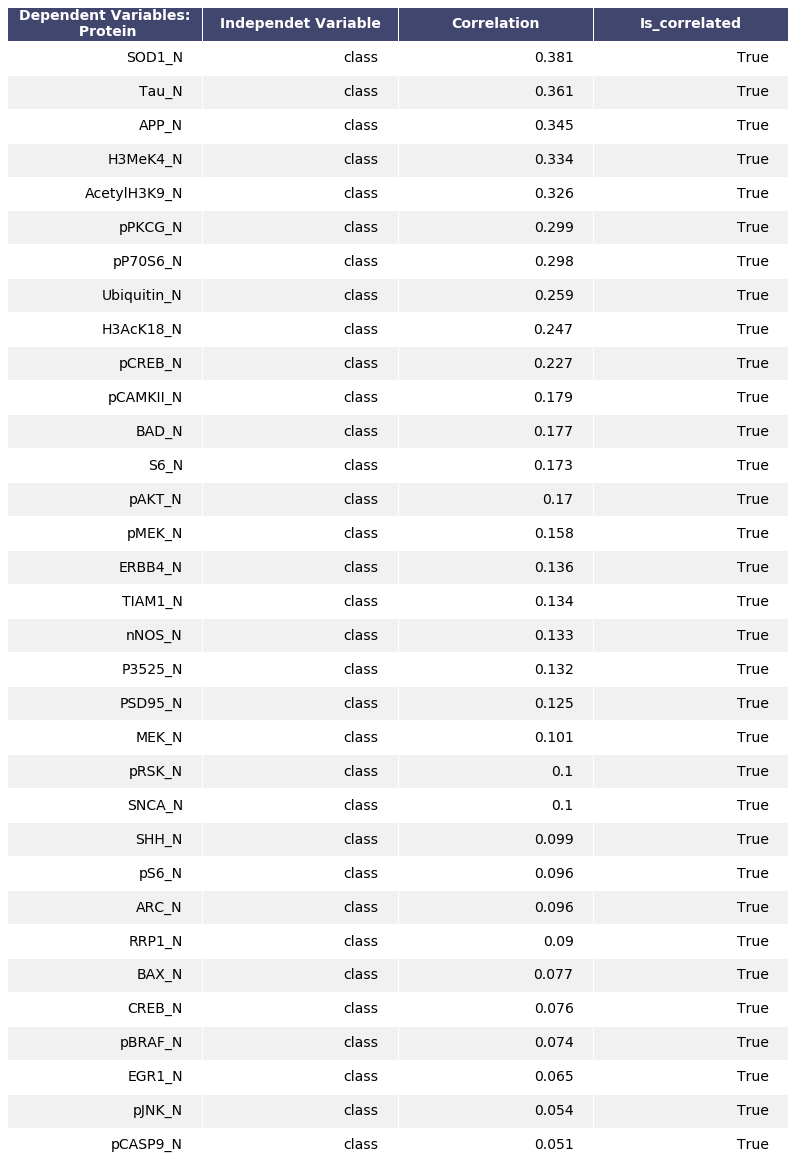

In [39]:
correlated_ft = corr_df[(corr_df['Is_correlated']== 'True')].sort_values(by='Correlation', ascending=False).round(3)
print(correlated_ft.shape)
correlated_ft

import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(correlated_ft, header_columns=0, col_width=3.5)

(44, 4)


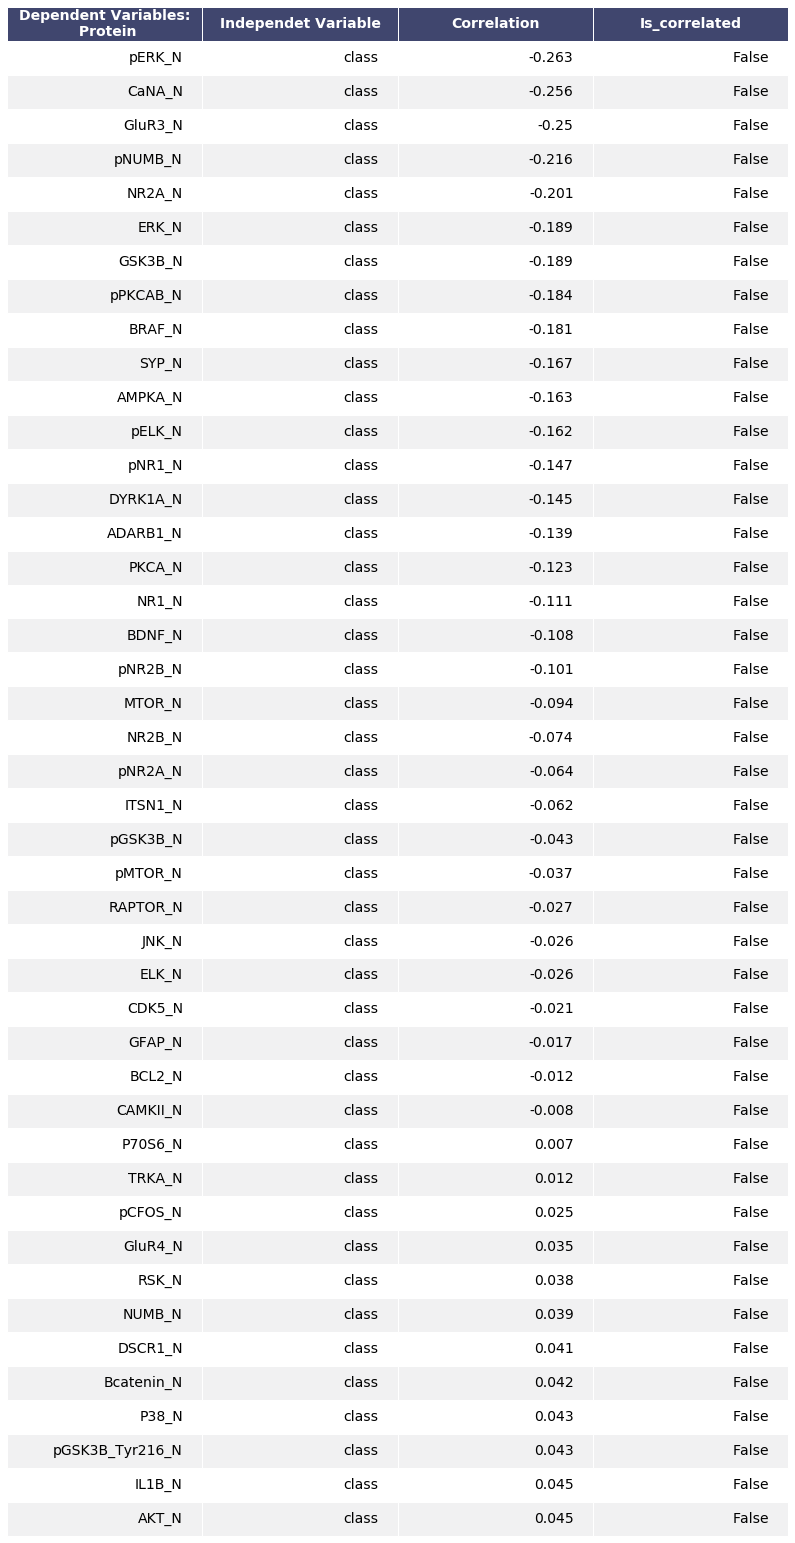

In [40]:
notcorrelated_ft = corr_df[(corr_df['Is_correlated']== 'False')].sort_values(by='Correlation', ascending=True).round(3)
print(notcorrelated_ft.shape)
notcorrelated_ft

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(notcorrelated_ft, header_columns=0, col_width=3.5)

(44, 4)


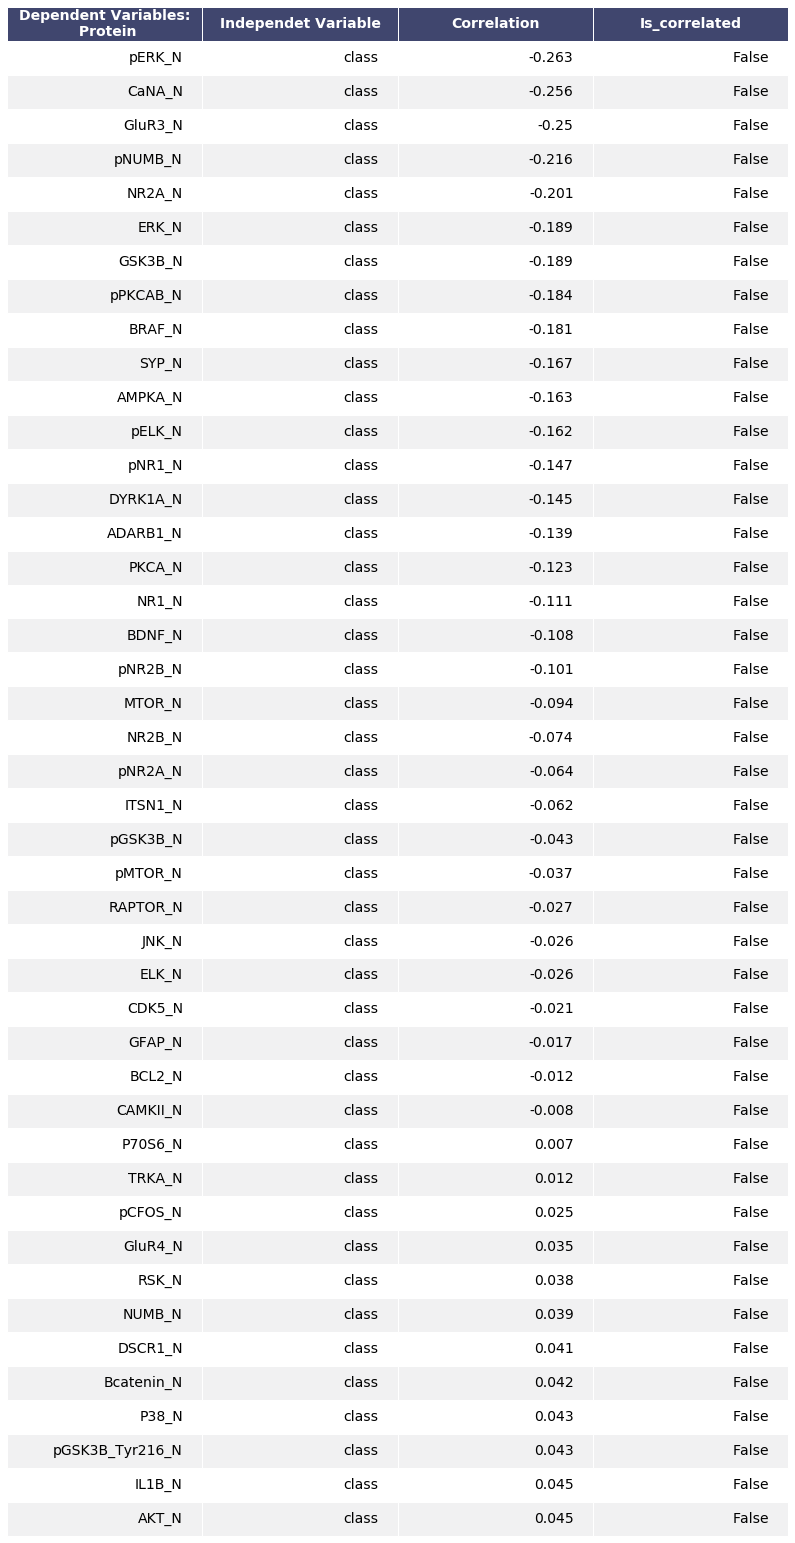

In [41]:
notcorrelated_ft = corr_df[(corr_df['Is_correlated']== 'False')].sort_values(by='Correlation', ascending=True).round(3)
print(notcorrelated_ft.shape)
notcorrelated_ft

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(notcorrelated_ft, header_columns=0, col_width=3.5)

In [42]:
corr = numerical_cols_target.corr()

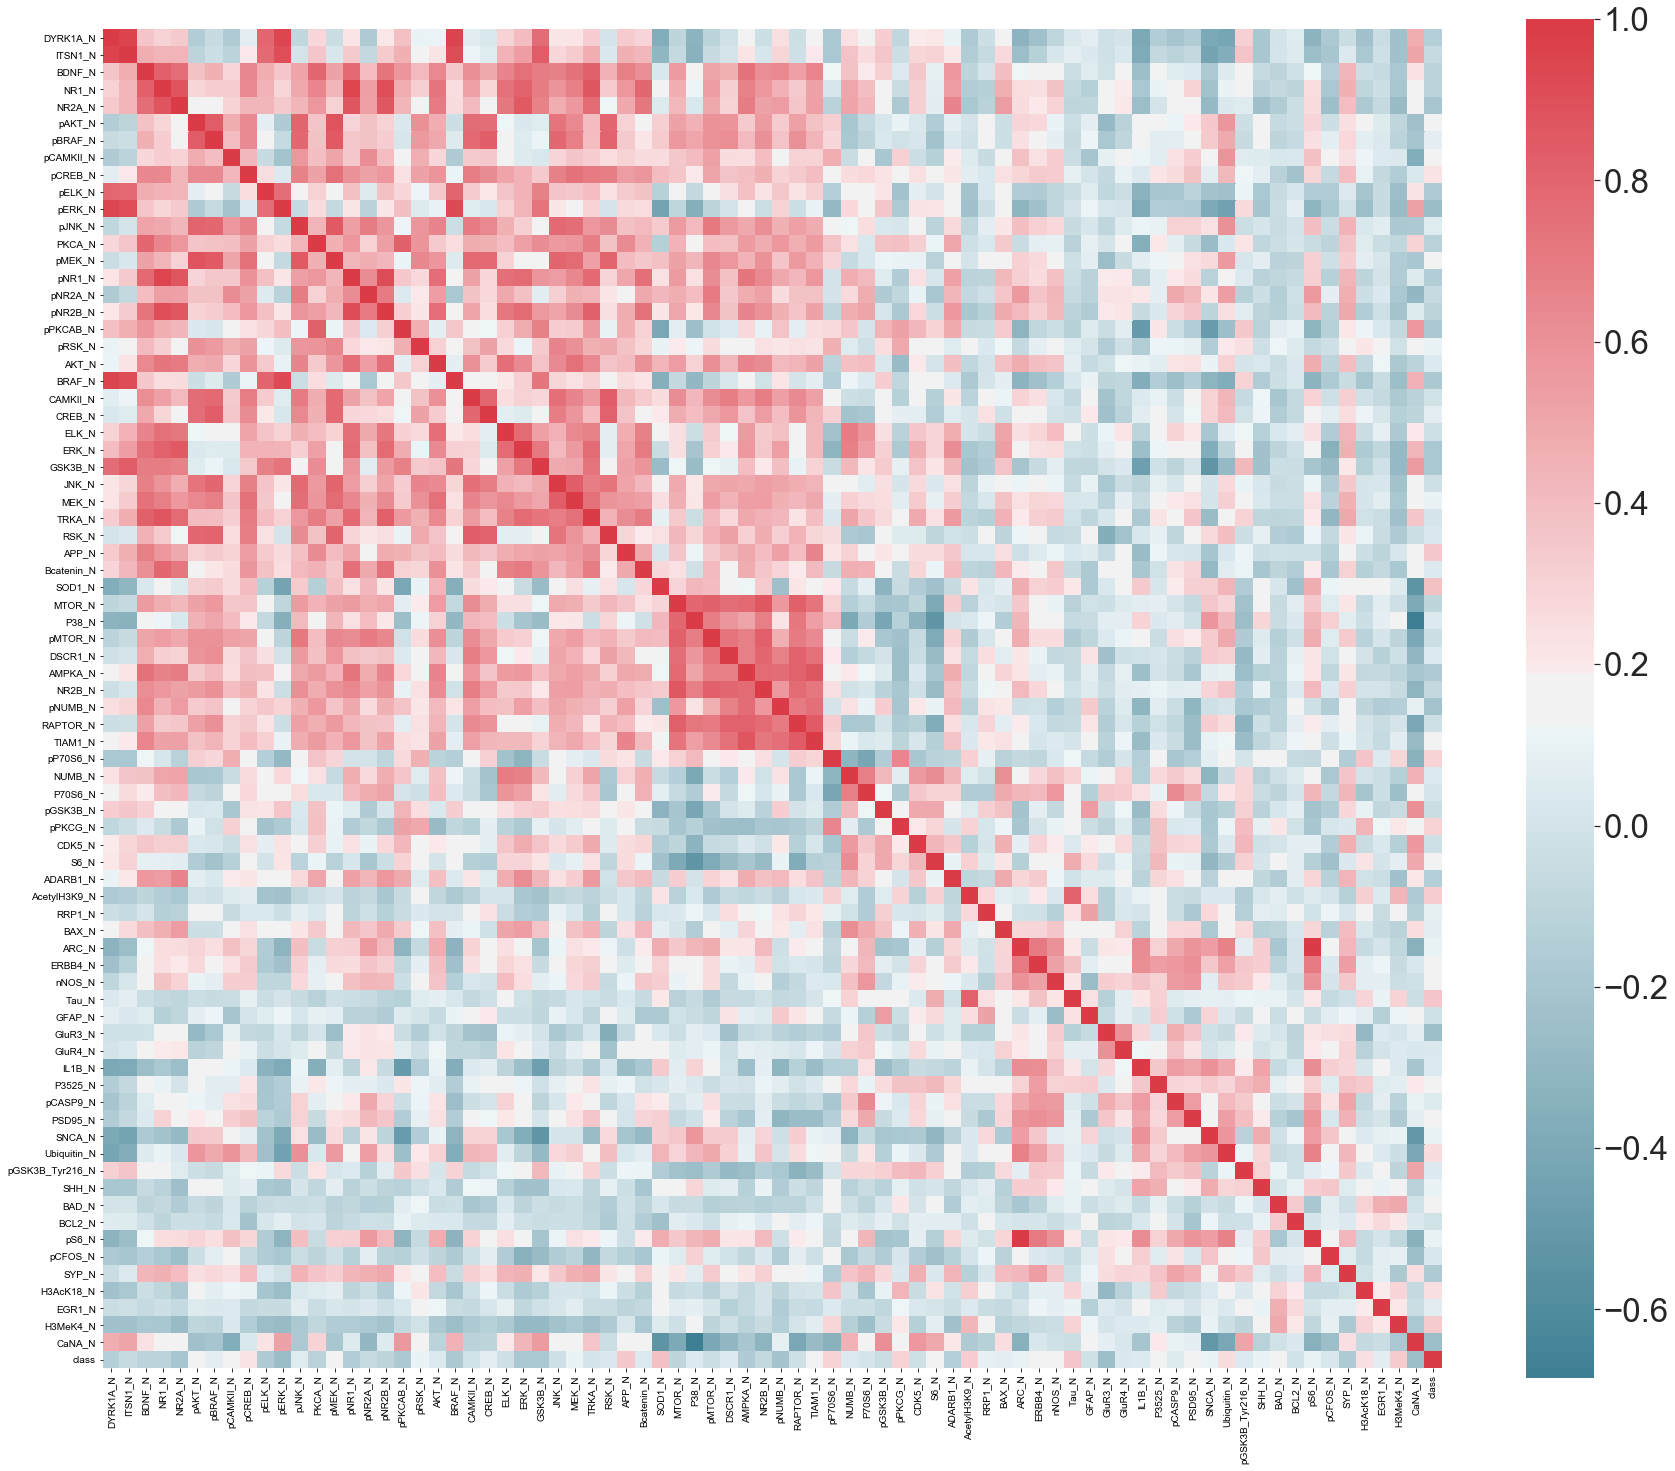

<Figure size 432x288 with 0 Axes>

In [43]:
import seaborn as sns
f, ax = plt.subplots(figsize=(30, 25))
sns.set(font_scale=3)
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)  


f = plt.gcf()
plt.show()
plt.draw()
f.savefig('corr.pdf', dpi =100)

Explore the relationship between all pairs of attributes (or at least 10 pairs of attributes, if there are more in the data), 

# Scatter plot

In [44]:
correlated_ft.head()

,Dependent Variables:\n Protein,Independet Variable,Correlation,Is_correlated
32,SOD1_N,class,0.381,True
56,Tau_N,class,0.361,True
30,APP_N,class,0.345,True
75,H3MeK4_N,class,0.334,True
50,AcetylH3K9_N,class,0.326,True


In [45]:
notcorrelated_ft.head()

,Dependent Variables:\n Protein,Independet Variable,Correlation,Is_correlated
10,pERK_N,class,-0.263,False
76,CaNA_N,class,-0.256,False
58,GluR3_N,class,-0.250,False
39,pNUMB_N,class,-0.216,False
4,NR2A_N,class,-0.201,False


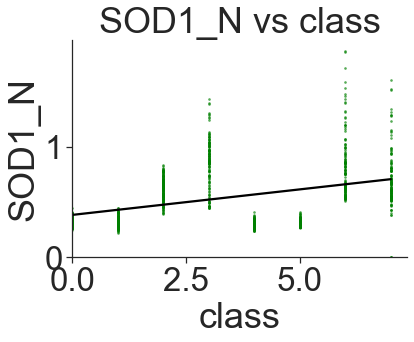

In [46]:
#pERK_N vs CaNA_N
sns.set_style('ticks')
sns.regplot(numerical_cols_target['class'].values,numerical_cols_target['SOD1_N'].values,  ci=None,scatter_kws={'alpha':0.5, 's':3, "color": "green"},line_kws={"color": "black"})
plt.ylim(0, None)
plt.xlim(0, None)
plt.title('SOD1_N vs class')
plt.ylabel('SOD1_N')
plt.xlabel('class')
sns.despine()

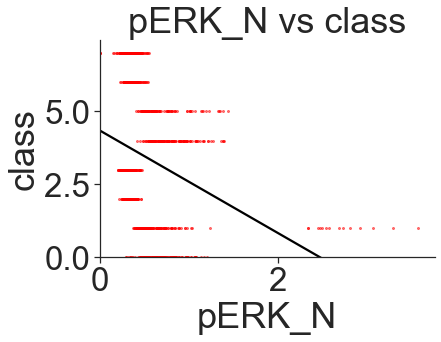

In [47]:
#pERK_N vs class
sns.set_style('ticks')
sns.regplot(numerical_cols_target['pERK_N'].values,  numerical_cols_target['class'].values,ci=None,scatter_kws={'alpha':0.5, 's':4, "color": "red"},line_kws={"color": "black"})
plt.ylim(0, None)
plt.xlim(0, None)
plt.title('pERK_N vs class')
plt.ylabel('class')
plt.xlabel('pERK_N')
sns.despine()

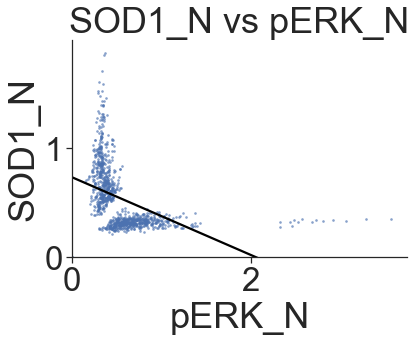

In [48]:
#SOD1_N vs pERK_N
sns.set_style('ticks')
sns.regplot(numerical_cols_target['pERK_N'].values,numerical_cols_target['SOD1_N'].values,  ci=None,scatter_kws={'alpha':0.5, 's':3},line_kws={"color": "black"})
plt.ylim(0, None)
plt.xlim(0, None)
plt.title('SOD1_N vs pERK_N')
plt.ylabel('SOD1_N')
plt.xlabel('pERK_N')
sns.despine()

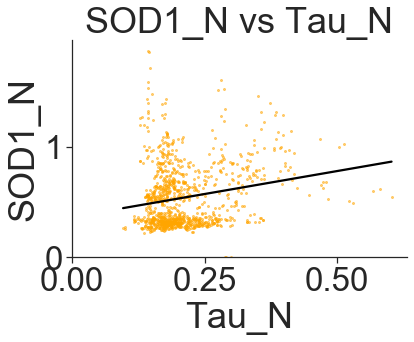

In [49]:
#SOD1_N vs Tau_N
sns.set_style('ticks')
sns.regplot(numerical_cols_target['Tau_N'].values,numerical_cols_target['SOD1_N'].values,  ci=None,scatter_kws={'alpha':0.5, 's':4, "color": "orange"},line_kws={"color": "black"})
plt.ylim(0, None)
plt.xlim(0, None)
plt.title('SOD1_N vs Tau_N')
plt.ylabel('SOD1_N')
plt.xlabel('Tau_N')
sns.despine()

# Boxplot

In [50]:
df_target =  numerical_cols.join(target)
df_target.head(3)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,0.0,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,0.0,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,0.0,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m


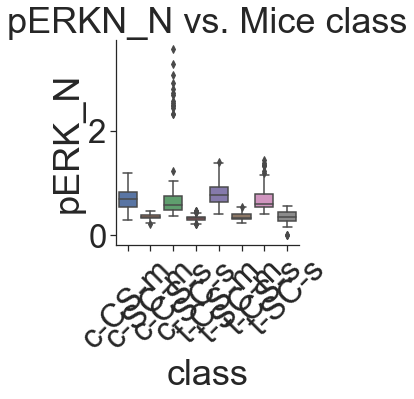

In [51]:
import seaborn as sns
#pERKN_N vs. Class
chart = sns.catplot(x="class", y="pERK_N", kind="box", data=df_target);
plt.title('pERKN_N vs. Mice class')
chart.set_xticklabels(rotation=45)
#plt.ylabel(fontsize = 14)
#plt.xlabel(fontsize = 14)
plt.show();

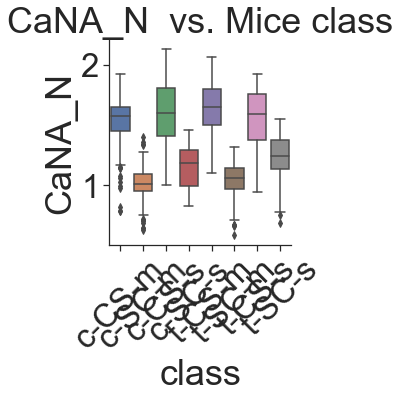

In [52]:
#CaNA_N vs. Class
chart = sns.catplot(x="class", y="CaNA_N", kind="box", data=df_target);
plt.title('CaNA_N  vs. Mice class')
chart.set_xticklabels(rotation=45)
plt.show();

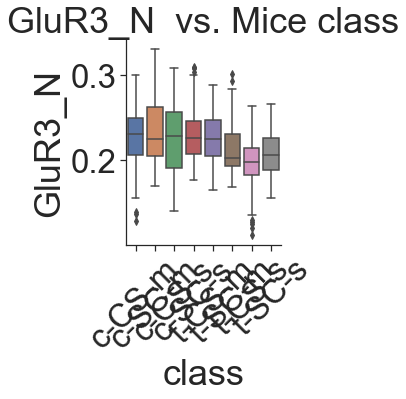

In [53]:
#GluR3_N vs. Class
chart = sns.catplot(x="class", y="GluR3_N", kind="box", data=df_target);
plt.title('GluR3_N  vs. Mice class')
chart.set_xticklabels(rotation=45)
plt.show();

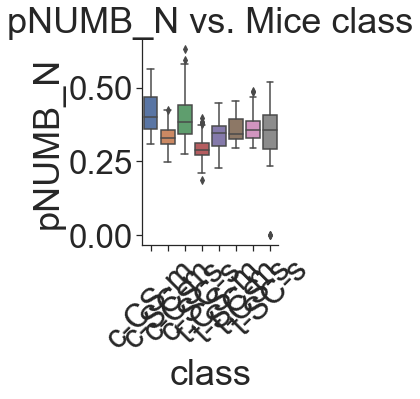

In [54]:
#pNUMB_N vs. Class
chart = sns.catplot(x="class", y="pNUMB_N", kind="box", data=df_target);
plt.title('pNUMB_N vs. Mice class')
chart.set_xticklabels(rotation=45)
plt.show();

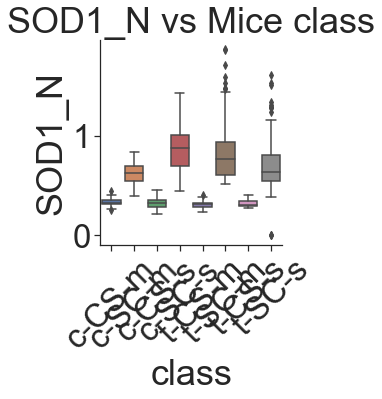

In [55]:
#SOD1_N vs. Class
chart = sns.catplot(x="class", y="SOD1_N", kind="box", data=df_target);
plt.title('SOD1_N vs Mice class')
chart.set_xticklabels(rotation=45)
plt.show();

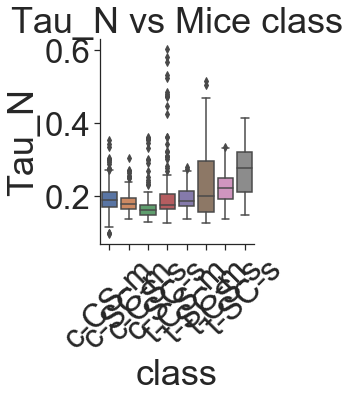

In [56]:
#Tau_N vs. Class
chart = sns.catplot(x="class", y="Tau_N", kind="box", data=df_target);
plt.title('Tau_N vs Mice class')
chart.set_xticklabels(rotation=45)
plt.show();

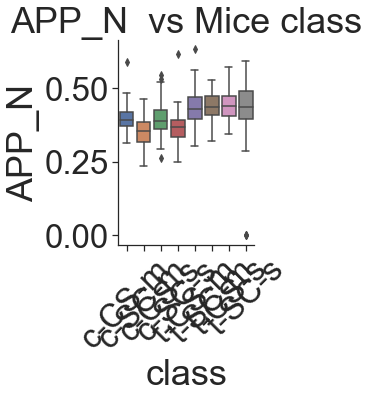

In [57]:
#APP_N vs. Class
chart = sns.catplot(x="class", y="APP_N", kind="box", data=df_target);
plt.title('APP_N  vs Mice class')
chart.set_xticklabels(rotation=45)
plt.show();

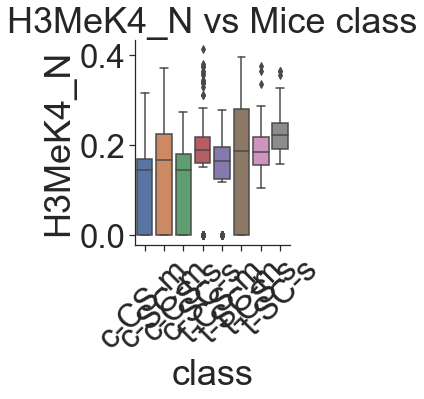

In [58]:
#H3MeK4_N vs. Class
chart = sns.catplot(x="class", y="H3MeK4_N", kind="box", data=df_target);
plt.title('H3MeK4_N vs Mice class')
chart.set_xticklabels(rotation=45)
plt.show();


# Task 2.3 Data Modelling

In [59]:
np.unique(target, return_counts=True)

(array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object),
 array([150, 135, 150, 135, 135, 105, 135, 135], dtype=int64))

In [60]:
categorical_cols = df.columns[df.dtypes == np.object].tolist()
categorical_cols

['Genotype', 'Treatment', 'Behavior']

In [61]:
#Value count for each categorical feature.
for categorical in categorical_cols:
    print(categorical + ':')
    print(df[categorical].value_counts())
    print('\n')

Genotype:
Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


Treatment:
Memantine    570
Saline       510
Name: Treatment, dtype: int64


Behavior:
S/C    555
C/S    525
Name: Behavior, dtype: int64




## Min Max Scaling

In [62]:
from sklearn import preprocessing 
df_min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = df_min_max_scaler.fit_transform(df.iloc[:,0:77])
df_scaled #returns a numpy array
df_scaled = pd.DataFrame(df_scaled, columns=df.iloc[:,0:77].columns)
df_scaled.head() #Show scaled df without target col yet

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.200147,0.287088,0.865266,0.749494,0.706173,0.405955,0.560028,0.318023,0.758289,0.286412,...,0.162941,0.434911,0.0,0.426816,0.422314,0.336299,0.239250,0.365381,0.309700,0.705738
1,0.204508,0.264753,0.828245,0.742358,0.670204,0.392609,0.545051,0.307091,0.741140,0.261130,...,0.220010,0.413743,0.0,0.429952,0.406642,0.365208,0.233393,0.374566,0.316786,0.749771
2,0.202348,0.280577,0.841397,0.715130,0.662779,0.387739,0.554214,0.305910,0.751833,0.255395,...,0.186816,0.420218,0.0,0.448652,0.414064,0.353621,0.233204,0.369739,0.307877,0.868229
3,0.175692,0.237094,0.721350,0.656515,0.587029,0.413479,0.556549,0.288355,0.675938,0.260919,...,0.179047,0.470828,0.0,0.392700,0.433721,0.265619,0.271812,0.408781,0.354917,0.721879
4,0.172844,0.237230,0.721704,0.629593,0.556280,0.395336,0.547606,0.285905,0.627460,0.246057,...,0.245702,0.460803,0.0,0.410187,0.431507,0.350381,0.246958,0.389014,0.358490,0.812053


In [63]:
target.value_counts()

c-SC-m    150
c-CS-m    150
t-CS-m    135
t-SC-m    135
c-SC-s    135
c-CS-s    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [64]:
df_scaled = df_scaled.assign(target = target.values)

df_scaled.sample(n=4, random_state=999) #check df with target cols

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,target
576,0.265851,0.347211,0.628441,0.609782,0.423785,0.384213,0.535967,0.291982,0.647383,0.272523,...,0.408241,0.000000,0.369513,0.000000,0.223442,0.237580,0.294253,0.329027,0.794049,t-CS-m
922,0.186989,0.314822,0.687033,0.648769,0.456029,0.388640,0.520762,0.310243,0.671221,0.226786,...,0.484461,0.383376,0.463371,0.442347,0.590724,0.214842,0.357207,0.367219,0.849810,t-CS-s
855,0.209417,0.333839,0.709135,0.716812,0.480417,0.443546,0.552763,0.617704,0.913234,0.240759,...,0.531655,0.440788,0.619655,0.428533,0.569424,0.371854,0.422414,0.411616,0.785946,t-CS-s
735,0.131331,0.218077,0.714673,0.727875,0.560091,0.470023,0.652402,0.452245,0.755955,0.289312,...,0.000000,0.000000,0.600654,0.543299,0.284417,0.000000,0.000000,0.772556,0.056513,t-SC-m


In [65]:
df_scaled.shape

(1080, 78)

# Task 3: Data Modeling

## Partition Descriptive Features and Target Feature

In [66]:
#Descriptive features
Data= df_scaled[list(df_scaled.columns)[0:-1]]
print(Data.shape)
Data.head()

(1080, 77)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.200147,0.287088,0.865266,0.749494,0.706173,0.405955,0.560028,0.318023,0.758289,0.286412,...,0.162941,0.434911,0.0,0.426816,0.422314,0.336299,0.239250,0.365381,0.309700,0.705738
1,0.204508,0.264753,0.828245,0.742358,0.670204,0.392609,0.545051,0.307091,0.741140,0.261130,...,0.220010,0.413743,0.0,0.429952,0.406642,0.365208,0.233393,0.374566,0.316786,0.749771
2,0.202348,0.280577,0.841397,0.715130,0.662779,0.387739,0.554214,0.305910,0.751833,0.255395,...,0.186816,0.420218,0.0,0.448652,0.414064,0.353621,0.233204,0.369739,0.307877,0.868229
3,0.175692,0.237094,0.721350,0.656515,0.587029,0.413479,0.556549,0.288355,0.675938,0.260919,...,0.179047,0.470828,0.0,0.392700,0.433721,0.265619,0.271812,0.408781,0.354917,0.721879
4,0.172844,0.237230,0.721704,0.629593,0.556280,0.395336,0.547606,0.285905,0.627460,0.246057,...,0.245702,0.460803,0.0,0.410187,0.431507,0.350381,0.246958,0.389014,0.358490,0.812053


In [67]:
#Target feature
target=df_scaled[list(df_scaled.columns)[-1]]
print(target.shape)
target.head()

(1080,)


0    c-CS-m
1    c-CS-m
2    c-CS-m
3    c-CS-m
4    c-CS-m
Name: target, dtype: object

# Feature Selection

### Hill Climbing

In [68]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=999)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.values[:, new_Ind]
    X_train_hc, X_test_hc, y_train_hc, y_test_hc = train_test_split(newData, Y, test_size=0.3, random_state=999)
    dt_clf = DecisionTreeClassifier()
    fit = dt_clf.fit(X_train_hc, y_train_hc)
    cur_Score = dt_clf.score(X_test_hc, y_test_hc)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.16666666666666666
Score with 2 selected features: 0.22839506172839505
Score with 3 selected features: 0.4166666666666667
Score with 4 selected features: 0.4567901234567901
Score with 5 selected features: 0.558641975308642
Score with 6 selected features: 0.5987654320987654
Score with 7 selected features: 0.6234567901234568
Score with 8 selected features: 0.6604938271604939
Score with 9 selected features: 0.7098765432098766
Score with 10 selected features: 0.7469135802469136
Score with 11 selected features: 0.7716049382716049
Score with 12 selected features: 0.7746913580246914
Score with 13 selected features: 0.7839506172839507
Score with 14 selected features: 0.7962962962962963
Score with 15 selected features: 0.8024691358024691
Score with 16 selected features: 0.8179012345679012
Score with 17 selected features: 0.8240740740740741
Score with 18 selected features: 0.8425925925925926
Score with 19 selected features: 0.8518518518518519
Score with 20 select

In [69]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_hc, y_train_hc)
cur_Score = dt_clf.score(X_test_hc, y_test_hc)

In [70]:
print(new_Ind)

[2, 57, 42, 44, 58, 33, 34, 15, 10, 65, 30, 29, 12, 26, 46, 39, 55, 32, 7, 62, 8]


In [71]:
new_Ind[0:20]

[2, 57, 42, 44, 58, 33, 34, 15, 10, 65, 30, 29, 12, 26, 46, 39, 55, 32, 7, 62]

In [72]:
best_features_hc= df_scaled.columns[new_Ind[0:20]].values
best_features_hc

array(['BDNF_N', 'GFAP_N', 'pP70S6_N', 'P70S6_N', 'GluR3_N', 'MTOR_N',
       'P38_N', 'pNR2A_N', 'pERK_N', 'Ubiquitin_N', 'APP_N', 'RSK_N',
       'PKCA_N', 'JNK_N', 'pPKCG_N', 'pNUMB_N', 'nNOS_N', 'SOD1_N',
       'pCAMKII_N', 'pCASP9_N'], dtype=object)

In [73]:
features_hc = pd.DataFrame({'Best Features Hill Climbing':best_features_hc})
features_hc

,Best Features Hill Climbing
0,BDNF_N
1,GFAP_N
2,pP70S6_N
3,P70S6_N
4,GluR3_N
5,MTOR_N
6,P38_N
7,pNR2A_N
8,pERK_N
9,Ubiquitin_N


### Repeated Stratified Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
cv_method = RepeatedStratifiedKFold(n_splits = 5,
                                   n_repeats = 3,
                                   random_state = 999)

scoring_metric = 'accuracy'

### Random Forest Importance

In [75]:
num_features = 20

In [76]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(Data, target) #descriptive and target features
fs_indices_rf = np.argsort(model_rf.feature_importances_)[::-1][0:num_features]
fs_indices_rf

array([32, 10, 46, 76, 30, 65,  7,  0,  1, 56, 53, 70, 17, 20, 42, 48, 34,
       19, 50, 39], dtype=int64)

In [77]:
best_features_rf = df_scaled.columns[fs_indices_rf].values
best_features_rf

array(['SOD1_N', 'pERK_N', 'pPKCG_N', 'CaNA_N', 'APP_N', 'Ubiquitin_N',
       'pCAMKII_N', 'DYRK1A_N', 'ITSN1_N', 'Tau_N', 'ARC_N', 'pS6_N',
       'pPKCAB_N', 'BRAF_N', 'pP70S6_N', 'S6_N', 'P38_N', 'AKT_N',
       'AcetylH3K9_N', 'pNUMB_N'], dtype=object)

In [78]:
feature_importances_rf = model_rf.feature_importances_[fs_indices_rf]
print(len(feature_importances_rf))
feature_importances_rf

20


array([0.05284027, 0.0400852 , 0.03903322, 0.03350939, 0.03267626,
       0.03036214, 0.02776945, 0.02666019, 0.02659352, 0.0265159 ,
       0.02378211, 0.0219724 , 0.02182656, 0.02107751, 0.02057276,
       0.02046969, 0.01998149, 0.01959215, 0.01802552, 0.01728169])

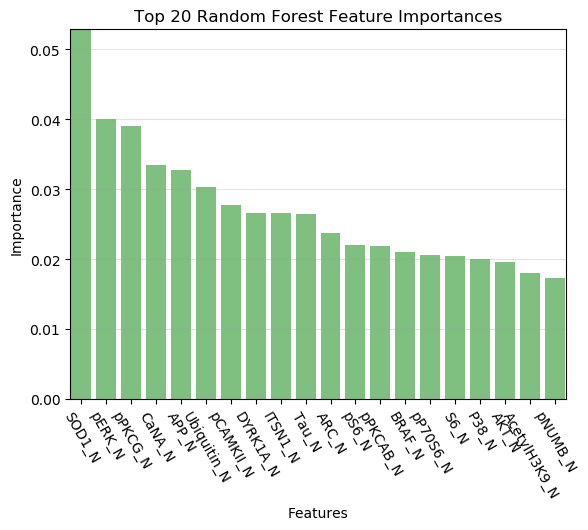

<Figure size 640x480 with 0 Axes>

In [79]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

width = .8

objects = best_features_rf
y_pos = np.arange(len(objects))
performance = feature_importances_rf


plt.bar(y_pos, performance, width, align='center', alpha=0.5, color='green')
plt.xticks(y_pos, objects, rotation=-60)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Random Forest Feature Importances')
plt.grid(color='#95a5a6', linewidth=.8, axis='y', alpha=0.3)

plt.margins(0.002,0)
plt.axis('tight')

f = plt.gcf()
plt.show()
plt.draw()
f.savefig('rfi.pdf', dpi =100)

In [80]:
features_dt = pd.DataFrame({'Best Features RFI': best_features_rf, 
                       'Feature importances': feature_importances_rf})
features_dt

,Best Features RFI,Feature importances
0,SOD1_N,0.052840
1,pERK_N,0.040085
2,pPKCG_N,0.039033
3,CaNA_N,0.033509
4,APP_N,0.032676
5,Ubiquitin_N,0.030362
6,pCAMKII_N,0.027769
7,DYRK1A_N,0.026660
8,ITSN1_N,0.026594
9,Tau_N,0.026516


In [81]:
clf = KNeighborsClassifier()
cv_results_rfi = cross_val_score(estimator=clf, 
                                 X=Data.loc[:, best_features_rf], 
                                 y=target, 
                                 cv=cv_method, 
                                 scoring=scoring_metric)
cv_results_rfi.mean().round(3)

0.98

### F-score

In [82]:
from sklearn import feature_selection as fs
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k = num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([32, 76, 65, 70, 53, 34, 48, 17, 45, 10, 64, 35, 60,  7, 15,  0,  1,
       39, 30, 20], dtype=int64)

In [83]:
best_features_fscore = Data.columns[fs_indices_fscore].values
best_features_fscore

array(['SOD1_N', 'CaNA_N', 'Ubiquitin_N', 'pS6_N', 'ARC_N', 'P38_N',
       'S6_N', 'pPKCAB_N', 'pGSK3B_N', 'pERK_N', 'SNCA_N', 'pMTOR_N',
       'IL1B_N', 'pCAMKII_N', 'pNR2A_N', 'DYRK1A_N', 'ITSN1_N', 'pNUMB_N',
       'APP_N', 'BRAF_N'], dtype=object)

In [84]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore.round(3)

array([276.246, 240.972, 161.164, 138.894, 138.894, 120.295,  98.047,
        92.041,  86.62 ,  86.405,  76.786,  75.581,  71.075,  70.258,
        66.782,  62.49 ,  61.513,  59.717,  58.184,  53.398])

In [85]:
best_fscore = pd.DataFrame(best_features_fscore, columns = ['Best Features F-Score'])
best_fscore['Feature Importances'] = pd.DataFrame(feature_importances_fscore.round(3))
best_fscore

,Best Features F-Score,Feature Importances
0,SOD1_N,276.246
1,CaNA_N,240.972
2,Ubiquitin_N,161.164
3,pS6_N,138.894
4,ARC_N,138.894
5,P38_N,120.295
6,S6_N,98.047
7,pPKCAB_N,92.041
8,pGSK3B_N,86.620
9,pERK_N,86.405


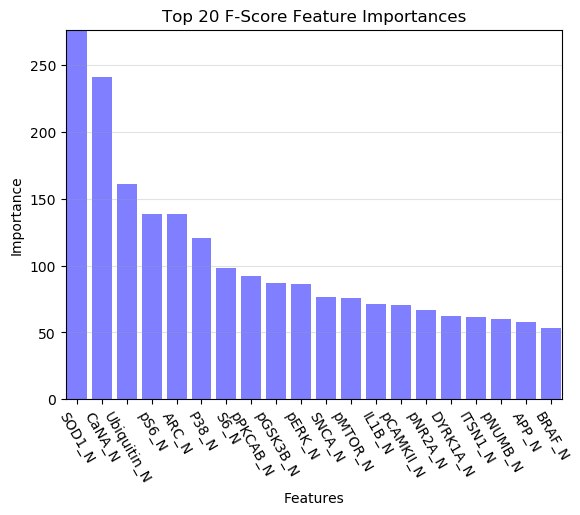

<Figure size 640x480 with 0 Axes>

In [86]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

width = .8

objects = best_features_fscore
y_pos = np.arange(len(objects))
performance = feature_importances_fscore


plt.bar(y_pos, performance, width, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects, rotation=-60)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 F-Score Feature Importances')
plt.grid(color='#95a5a6', linewidth=.8, axis='y', alpha=0.3)

plt.margins(0.002,0)
plt.axis('tight')

f = plt.gcf()
plt.show()
plt.draw()
f.savefig('fscore.pdf', dpi =100)

In [87]:
cv_results_fscore = cross_val_score(estimator=clf, 
                                    X=Data.loc[:, best_features_fscore], 
                                    y=target, 
                                    cv=cv_method, 
                                    scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.969

In [88]:
features_dt = pd.DataFrame({'RFI Selected Features': best_features_rf, 
                            'RFI Feature importances': feature_importances_rf,
                           'F-Score Selected Features': best_features_fscore, 
                            'F-Score Feature importances': feature_importances_fscore})
features_dt

,RFI Selected Features,RFI Feature importances,F-Score Selected Features,F-Score Feature importances
0,SOD1_N,0.052840,SOD1_N,276.245840
1,pERK_N,0.040085,CaNA_N,240.971768
2,pPKCG_N,0.039033,Ubiquitin_N,161.163800
3,CaNA_N,0.033509,pS6_N,138.893732
4,APP_N,0.032676,ARC_N,138.893732
5,Ubiquitin_N,0.030362,P38_N,120.295216
6,pCAMKII_N,0.027769,S6_N,98.047339
7,DYRK1A_N,0.026660,pPKCAB_N,92.040868
8,ITSN1_N,0.026594,pGSK3B_N,86.619666
9,Tau_N,0.026516,pERK_N,86.405113


### Summary of Feature Selection 

In [89]:
feature_select_summary = pd.DataFrame(columns = ['Feature Selection Method', 'Mean'])
feature_select_summary.loc[len(feature_select_summary)] = ['F-Score', cv_results_fscore.mean().round(3)]
feature_select_summary.loc[len(feature_select_summary)] = ['Random Forest Importance', cv_results_rfi.mean().round(3)]

feature_select_summary

,Feature Selection Method,Mean
0,F-Score,0.969
1,Random Forest Importance,0.980


# Apply 20 best features to new data

In [90]:
df_scaled.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,target
0,0.200147,0.287088,0.865266,0.749494,0.706173,0.405955,0.560028,0.318023,0.758289,0.286412,...,0.434911,0.0,0.426816,0.422314,0.336299,0.239250,0.365381,0.309700,0.705738,c-CS-m
1,0.204508,0.264753,0.828245,0.742358,0.670204,0.392609,0.545051,0.307091,0.741140,0.261130,...,0.413743,0.0,0.429952,0.406642,0.365208,0.233393,0.374566,0.316786,0.749771,c-CS-m
2,0.202348,0.280577,0.841397,0.715130,0.662779,0.387739,0.554214,0.305910,0.751833,0.255395,...,0.420218,0.0,0.448652,0.414064,0.353621,0.233204,0.369739,0.307877,0.868229,c-CS-m
3,0.175692,0.237094,0.721350,0.656515,0.587029,0.413479,0.556549,0.288355,0.675938,0.260919,...,0.470828,0.0,0.392700,0.433721,0.265619,0.271812,0.408781,0.354917,0.721879,c-CS-m
4,0.172844,0.237230,0.721704,0.629593,0.556280,0.395336,0.547606,0.285905,0.627460,0.246057,...,0.460803,0.0,0.410187,0.431507,0.350381,0.246958,0.389014,0.358490,0.812053,c-CS-m


In [91]:
data_sample = df_scaled[best_features_rf]
print(data_sample.shape)
data_sample.head()

(1080, 20)


,SOD1_N,pERK_N,pPKCG_N,CaNA_N,APP_N,Ubiquitin_N,pCAMKII_N,DYRK1A_N,ITSN1_N,Tau_N,ARC_N,pS6_N,pPKCAB_N,BRAF_N,pP70S6_N,S6_N,P38_N,AKT_N,AcetylH3K9_N,pNUMB_N
0,0.197293,0.192870,0.303363,0.705738,0.717459,0.256699,0.318023,0.200147,0.287088,0.057168,0.426816,0.426816,0.754150,0.195128,0.260518,0.324085,0.359318,0.726936,0.083584,0.625497
1,0.182754,0.194861,0.302059,0.749771,0.681153,0.226088,0.307091,0.204508,0.264753,0.075103,0.429952,0.429952,0.667356,0.187663,0.244808,0.324004,0.348066,0.706037,0.084514,0.583556
2,0.183510,0.189910,0.332565,0.868229,0.668899,0.214719,0.305910,0.202348,0.280577,0.071718,0.448652,0.448652,0.659173,0.187421,0.227289,0.369553,0.348084,0.688840,0.094486,0.576624
3,0.183944,0.163535,0.364189,0.721879,0.649027,0.208943,0.288355,0.175692,0.237094,0.053257,0.392700,0.392700,0.696663,0.180761,0.352944,0.231762,0.353730,0.615564,0.076248,0.581205
4,0.175731,0.154474,0.376199,0.812053,0.629956,0.215528,0.285905,0.172844,0.237230,0.080162,0.410187,0.410187,0.657773,0.172273,0.348439,0.258720,0.335829,0.581804,0.079697,0.557087


# Splitting into train and test split

In [92]:
#Split into training and testing 70/30
X_train, X_test, y_train, y_test = train_test_split(data_sample, target, test_size=0.3, random_state=999)

print(X_train.shape)
print(X_test.shape)

(756, 20)
(324, 20)


In [93]:
#Show partition of train and test set
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({'c-SC-m': 115, 'c-CS-m': 99, 't-CS-m': 95, 't-SC-m': 94, 't-SC-s': 93, 'c-SC-s': 92, 'c-CS-s': 91, 't-CS-s': 77})
Testing target statistics: Counter({'c-CS-m': 51, 'c-CS-s': 44, 'c-SC-s': 43, 't-SC-s': 42, 't-SC-m': 41, 't-CS-m': 40, 'c-SC-m': 35, 't-CS-s': 28})


# Cross-Validation and Hyperparameter Tuning

### Stratified 5-fold Cross Validation

In [94]:
cv_method = StratifiedKFold(n_splits=5,
                            random_state=999)

### K Nearest Neighbor (KNN) Baseline Model

In [95]:
#Fit a baseline model
from sklearn.neighbors import KNeighborsClassifier  
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

y_pred_defaultKNN =  knn_clf.predict(X_test)

In [96]:
knn_clf_trainacc = metrics.accuracy_score(y_train, knn_clf.predict(X_train))
knn_clf_testacc = metrics.accuracy_score(y_test, y_pred_defaultKNN)

In [97]:
print("Baseline KNN Train Accuracy:",knn_clf_trainacc)
print("Baseline KNN Test Accuracy:", knn_clf_testacc)

Baseline KNN Train Accuracy: 0.9894179894179894
Baseline KNN Test Accuracy: 0.9753086419753086


In [98]:
print('Default Parameters of KNN:\n')
knn_clf_params = knn_clf.get_params()
knn_clf_params

Default Parameters of KNN:



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

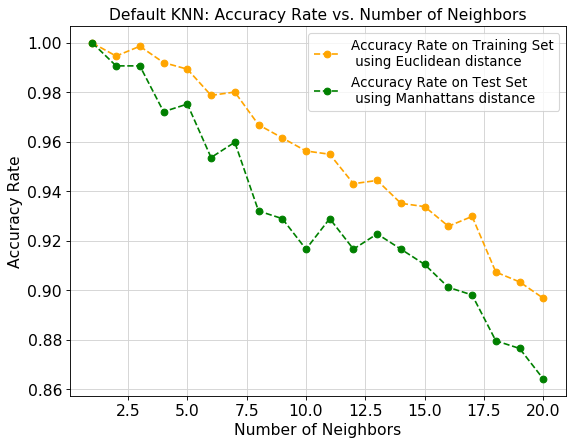

<Figure size 640x480 with 0 Axes>

In [99]:
accuracy_rate = []
training_acc = []

for i in range(1,21):   
    knn_clf = KNeighborsClassifier(n_neighbors=i,
                                  p=2)
    knn_fit = knn_clf.fit(X_train, y_train)
    accuracy_rate.append(knn_clf.score(X_test, y_test))
    training_acc.append(knn_clf.score(X_train, y_train))


from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

plt.plot(np.arange(1,21), training_acc,color='orange', linestyle='dashed', marker='o',
         markerfacecolor='orange', label='Accuracy Rate on Training Set\n using Euclidean distance') #TRAINING
plt.plot(np.arange(1,21), accuracy_rate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='green', label='Accuracy Rate on Test Set\n using Manhattans distance') #TEST

plt.title('Default KNN: Accuracy Rate vs. Number of Neighbors', fontsize = 14)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy Rate', fontsize = 14)
plt.legend(loc=1, prop={'size': 12})
ax.set_facecolor('xkcd:white')
plt.grid('True', color='lightgray')

f = plt.gcf()
plt.show()
plt.draw()
f.savefig('baselineKNN.pdf', dpi =100)

In [100]:
print("\nClassification report for Default K-Nearest Neighbor") 
print(metrics.classification_report(y_test, y_pred_defaultKNN))

print("\nConfusion matrix for Default K-Nearest Neighbor") 
print(metrics.confusion_matrix(y_test, y_pred_defaultKNN))


Classification report for Default K-Nearest Neighbor
              precision    recall  f1-score   support

      c-CS-m       0.89      1.00      0.94        51
      c-CS-s       1.00      0.89      0.94        44
      c-SC-m       0.97      1.00      0.99        35
      c-SC-s       1.00      0.98      0.99        43
      t-CS-m       1.00      0.97      0.99        40
      t-CS-s       1.00      1.00      1.00        28
      t-SC-m       0.98      0.98      0.98        41
      t-SC-s       1.00      1.00      1.00        42

    accuracy                           0.98       324
   macro avg       0.98      0.98      0.98       324
weighted avg       0.98      0.98      0.98       324


Confusion matrix for Default K-Nearest Neighbor
[[51  0  0  0  0  0  0  0]
 [ 5 39  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 42  0  0  1  0]
 [ 1  0  0  0 39  0  0  0]
 [ 0  0  0  0  0 28  0  0]
 [ 0  0  1  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 42]]


### KNN Hyperparameter Tuning and Visualization 

In [101]:
from sklearn.model_selection import GridSearchCV

knn_classifier = KNeighborsClassifier()

params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}

gs_KNN = GridSearchCV(estimator= knn_classifier,
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [102]:
gs_KNN.fit(X_train, y_train);

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    8.4s finished


In [103]:
print('Tuned Parameters of KNN:\n')
knn_clf_bestparams = gs_KNN.best_params_
knn_clf_bestparams

Tuned Parameters of KNN:



{'n_neighbors': 1, 'p': 2}

In [104]:
#Summary of parameter comparison
comparison_params = pd.DataFrame(columns=['KNN Parameters', 'n_neighbors', 'p', 'distance metric'])
comparison_params.loc[len(comparison_params)] = ['Baseline KNN',knn_clf_params.get('n_neighbors'), knn_clf_params.get('p'), 'Euclidean']
comparison_params.loc[len(comparison_params)] = ['Tuned KNN',knn_clf_bestparams.get('n_neighbors'), knn_clf_bestparams.get('p'),'Manhattan']
comparison_params

,KNN Parameters,n_neighbors,p,distance metric
0,Baseline KNN,5,2,Euclidean
1,Tuned KNN,1,2,Manhattan


In [105]:
gs_KNN.cv_results_['mean_test_score']

array([0.9907459 , 0.99206169, 0.98281631, 0.9761938 , 0.9814831 ,
       0.96296619, 0.972229  , 0.972229  , 0.95371209, 0.96427327,
       0.96428198, 0.94050192, 0.96030847, 0.96031718, 0.93123039,
       0.95501046, 0.94973858, 0.92066051, 0.95501046, 0.94047578,
       0.91930986])

In [106]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['distance metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN 

,n_neighbors,p,test_score,distance metric
0,1,1,0.990746,Manhattan
1,1,2,0.992062,Euclidean
2,1,5,0.982816,Minkowski
3,2,1,0.976194,Manhattan
4,2,2,0.981483,Euclidean
5,2,5,0.962966,Minkowski
6,3,1,0.972229,Manhattan
7,3,2,0.972229,Euclidean
8,3,5,0.953712,Minkowski
9,4,1,0.964273,Manhattan


Text(0.5, 0, 'Number of Neighbors')

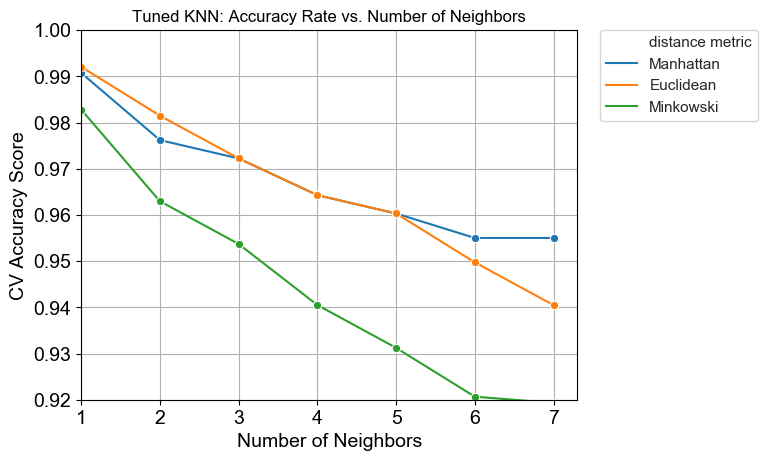

In [107]:
import seaborn as sns;
import matplotlib.pyplot as plt

ax = sns.lineplot(x="n_neighbors", y="test_score", hue="distance metric",
                  data=results_KNN,marker="o")
#sns.set_style("whitegrid")
sns.set(style="whitegrid")
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.ylim(.92, 1.0)
plt.xlim(1.0, None)
ax.legend(loc='center right', bbox_to_anchor=(1.38, .878), ncol=1)


plt.title('Tuned KNN: Accuracy Rate vs. Number of Neighbors')
plt.ylabel('CV Accuracy Score')
plt.xlabel('Number of Neighbors')

### Fit tuned KNN classifier

### Stratified 10-fold Cross Validation

In [108]:
from sklearn.model_selection import StratifiedKFold

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

In [109]:
print("Tuned KNN Train Accuracy:", gs_KNN.best_score_.round(3))

Tuned KNN Train Accuracy: 0.992


In [110]:
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
print("Tuned KNN Test Accuracy:", cv_results_KNN.mean().round(3))

Tuned KNN Test Accuracy: 0.951


In [111]:
comparison_accuracy = pd.DataFrame(columns = ['KNN Classifier',  'Train Accuracy', 'Test Accuracy'])
comparison_accuracy.loc[len(comparison_accuracy)] = ['Baseline KNN',knn_clf_trainacc, knn_clf_testacc]
comparison_accuracy.loc[len(comparison_accuracy)] = ['Tuned KNN', gs_KNN.best_score_, cv_results_KNN.mean()]
comparison_accuracy.round(3)

,KNN Classifier,Train Accuracy,Test Accuracy
0,Baseline KNN,0.989,0.975
1,Tuned KNN,0.992,0.951


# Decision Tree

### DT Baseline model

In [112]:
#Fit a baseline model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=999)
dt_clf.fit(X_train, y_train)
y_pred_defaultDT = dt_clf.predict(X_test)  

In [113]:
dt_clf_trainacc = metrics.accuracy_score(y_train, dt_clf.predict(X_train))
dt_clf_testacc = metrics.accuracy_score(y_test, y_pred_defaultDT)

In [114]:
print("Baseline DT Train Accuracy:",dt_clf_trainacc)
print("Baseline DT Test Accuracy:", dt_clf_testacc)

Baseline DT Train Accuracy: 1.0
Baseline DT Test Accuracy: 0.8333333333333334


In [115]:
from pprint import pprint
print('Default Parameters of Decision Tree:\n')
dt_clf_params = dt_clf.get_params()
dt_clf_params

Default Parameters of Decision Tree:



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 999,
 'splitter': 'best'}

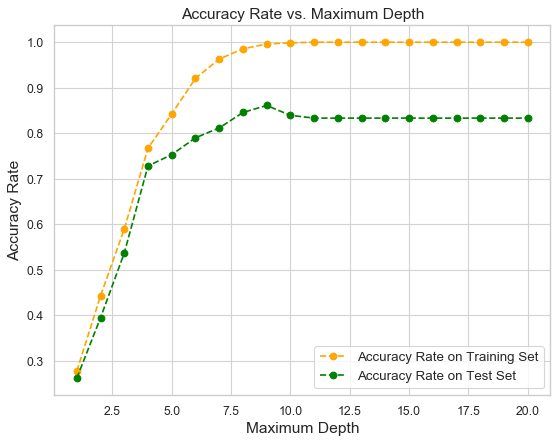

<Figure size 640x480 with 0 Axes>

In [116]:
accuracy_rate = []
training_acc = []

for i in range(1,21):   
    dt_clf = DecisionTreeClassifier(max_depth=i,
                                    criterion='gini',
                                    min_samples_split= 2,
                                    random_state=999)
    dt_clf.fit(X_train, y_train) 
    accuracy_rate.append(dt_clf.score(X_test, y_test))
    training_acc.append(dt_clf.score(X_train, y_train))


from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(12,6))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

plt.plot(np.arange(1,21), training_acc,color='orange', linestyle='dashed', marker='o',
         markerfacecolor='orange', label='Accuracy Rate on Training Set') #TRAINING
plt.plot(np.arange(1,21), accuracy_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='green', label='Accuracy Rate on Test Set') #TEST

plt.title('Accuracy Rate vs. Maximum Depth', fontsize = 14)
plt.xlabel('Maximum Depth', fontsize = 14)
plt.ylabel('Accuracy Rate', fontsize = 14)
plt.legend(loc=4, prop={'size': 12})
ax.set_facecolor('xkcd:white')
plt.grid('True', color='lightgray')

f = plt.gcf()
plt.show()
plt.draw()
f.savefig('orgacc.pdf', dpi =100)

In [117]:
print("\nClassification report for Default DT") 
print(metrics.classification_report(y_test, y_pred_defaultDT))

print("\nConfusion matrix for Default DT") 
print(metrics.confusion_matrix(y_test, y_pred_defaultDT))


Classification report for Default DT
              precision    recall  f1-score   support

      c-CS-m       0.71      0.73      0.72        51
      c-CS-s       0.82      0.70      0.76        44
      c-SC-m       0.89      0.97      0.93        35
      c-SC-s       0.95      0.84      0.89        43
      t-CS-m       0.79      0.75      0.77        40
      t-CS-s       0.68      0.82      0.74        28
      t-SC-m       0.90      0.93      0.92        41
      t-SC-s       0.93      0.98      0.95        42

    accuracy                           0.83       324
   macro avg       0.83      0.84      0.83       324
weighted avg       0.84      0.83      0.83       324


Confusion matrix for Default DT
[[37  4  0  0  5  5  0  0]
 [ 7 31  0  0  0  5  0  1]
 [ 0  0 34  0  0  0  1  0]
 [ 0  0  2 36  0  0  3  2]
 [ 6  3  0  0 30  1  0  0]
 [ 2  0  0  0  3 23  0  0]
 [ 0  0  1  2  0  0 38  0]
 [ 0  0  1  0  0  0  0 41]]


###  DT Hyperparameter tuning and Visualization

In [118]:
#GridSearch
dt_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 4, 6,8,10],
             'min_samples_split': [2, 3,4,6,8],
            'min_samples_leaf': [1, 2,3,4,5],
             'class_weight' :[None, "balanced"] 
            }

gs_DT = GridSearchCV(estimator=dt_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_train, y_train);

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   44.9s finished


In [119]:
print('Parameters of Decision Tree with Hyperparameter GridSearch:\n')
dt_clf_bestparams = gs_DT.best_params_
dt_clf_bestparams

Parameters of Decision Tree with Hyperparameter GridSearch:



{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [120]:
#Summary of parameter comparison
comparison_params = pd.DataFrame(columns=['Decision Tree Parameters', 'criterion', 'max_depth', 'min_samples_split','min_samples_leaf'])
comparison_params.loc[len(comparison_params)] = ['Baseline Decision Tree', dt_clf_params.get('criterion'), dt_clf_params.get('max_depth'),dt_clf_params.get('min_samples_split'),dt_clf_params.get('min_samples_leaf')]
comparison_params.loc[len(comparison_params)] = ['Tuned Decision Tree', dt_clf_bestparams.get('criterion'), dt_clf_bestparams.get('max_depth'),dt_clf_bestparams.get('min_samples_split'),dt_clf_params.get('min_samples_leaf')]
comparison_params

,Decision Tree Parameters,criterion,max_depth,min_samples_split,min_samples_leaf
0,Baseline Decision Tree,gini,None,2,1
1,Tuned Decision Tree,entropy,10,3,1


In [121]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.round(3)

,class_weight,criterion,max_depth,min_samples_leaf,min_samples_split,test_score
0,None,gini,1,1,2,0.276
1,None,gini,1,1,3,0.276
2,None,gini,1,1,4,0.276
3,None,gini,1,1,6,0.276
4,None,gini,1,1,8,0.276
...,...,...,...,...,...,...
595,balanced,entropy,10,5,2,0.804
596,balanced,entropy,10,5,3,0.804
597,balanced,entropy,10,5,4,0.804
598,balanced,entropy,10,5,6,0.804


Text(0.5, 0, 'Maximum Depth')

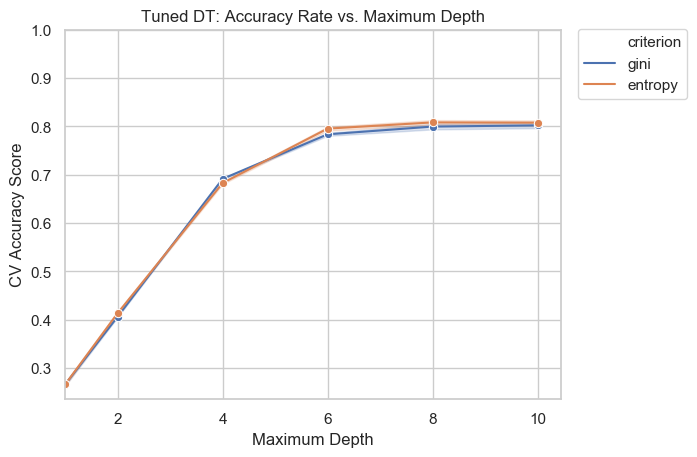

In [122]:
import seaborn as sns;
import matplotlib.pyplot as plt

ax = sns.lineplot(x='max_depth', y="test_score", hue="criterion",
                  data=results_DT,marker="o")
#sns.set_style("whitegrid")
sns.set(style="whitegrid")
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.ylim(None, 1.0)
plt.xlim(1.0, None)
ax.legend(loc='center right', bbox_to_anchor=(1.27, .907), ncol=1)


plt.title('Tuned DT: Accuracy Rate vs. Maximum Depth')
plt.ylabel('CV Accuracy Score')
plt.xlabel('Maximum Depth')

### Fit tuned DT classifier

In [123]:
print("Tuned DT Train Accuracy:",gs_DT.best_score_.round(3))

Tuned DT Train Accuracy: 0.848


In [124]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
print("Tuned DT Test Accuracy:", cv_results_DT.mean().round(3))

Tuned DT Test Accuracy: 0.778


In [125]:
comparison_accuracy = pd.DataFrame(columns = ['Decision Tree Classifier',  'Train Accuracy', 'Test Accuracy'])
comparison_accuracy.loc[len(comparison_accuracy)] = ['Baseline DT',dt_clf_trainacc, dt_clf_testacc]
comparison_accuracy.loc[len(comparison_accuracy)] = ['Tuned DT', gs_DT.best_score_, cv_results_DT.mean()]
comparison_accuracy.round(3)

,Decision Tree Classifier,Train Accuracy,Test Accuracy
0,Baseline DT,1.000,0.833
1,Tuned DT,0.848,0.778


In [126]:
feature_listnew = list(data_sample.columns)
len(feature_listnew)

20

In [127]:
#!pip install pydot

#!pip install graphviz

In [128]:
#conda install -c https://conda.binstar.org/sstromberg pydot

In [129]:
#conda install pydot

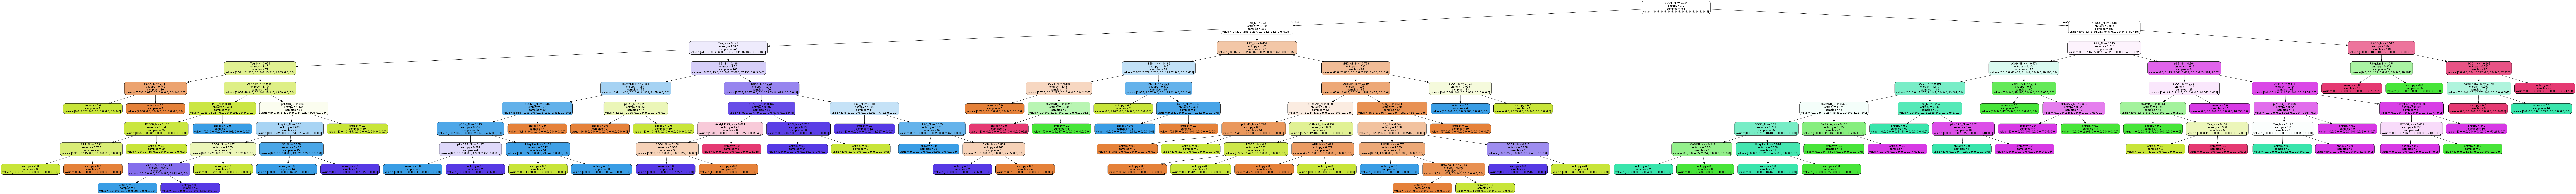

In [130]:
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot 


dot_data = StringIO()  
export_graphviz(gs_DT.best_estimator_ , out_file=dot_data,feature_names=feature_listnew,filled=True,rounded=True)
 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
#graph.write_png("finaltree.png")

# Model Evaluation

### KNN

In [131]:
#Fit the DT grid search to the data
y_pred_KNN =  gs_KNN.best_estimator_.predict(X_test)

### Classification Report

In [132]:
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(y_test, y_pred_KNN))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        51
      c-CS-s       1.00      1.00      1.00        44
      c-SC-m       1.00      1.00      1.00        35
      c-SC-s       1.00      1.00      1.00        43
      t-CS-m       1.00      1.00      1.00        40
      t-CS-s       1.00      1.00      1.00        28
      t-SC-m       1.00      1.00      1.00        41
      t-SC-s       1.00      1.00      1.00        42

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



### Confusion Matrix

In [133]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix
[[51  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 42]]


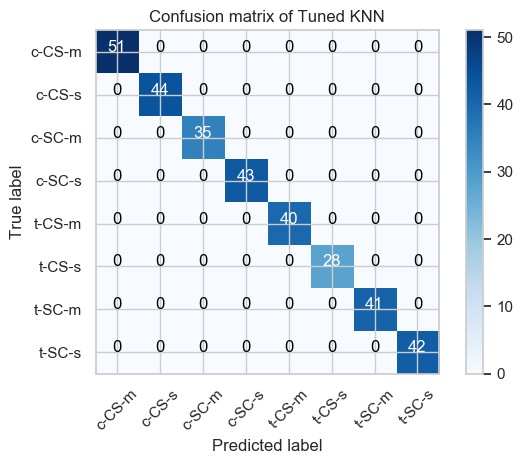

In [134]:
cnf_matrix = confusion_matrix(y_test, y_pred_KNN,labels=['c-CS-m', 'c-CS-s','c-SC-m', 'c-SC-s','t-CS-m', 't-CS-s','t-SC-m', 't-SC-s'])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['c-CS-m', 'c-CS-s','c-SC-m', 'c-SC-s','t-CS-m', 't-CS-s','t-SC-m', 't-SC-s'],                      
                      title='Confusion matrix of Tuned KNN')

### Decision Tree

In [135]:
#Fit the DT grid search to the data
y_pred_DT =  gs_DT.best_estimator_.predict(X_test)

### Classification Report

In [136]:
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(y_test, y_pred_DT))


Classification report for Decision Tree
              precision    recall  f1-score   support

      c-CS-m       0.90      0.69      0.78        51
      c-CS-s       0.82      0.61      0.70        44
      c-SC-m       0.92      0.97      0.94        35
      c-SC-s       0.93      0.88      0.90        43
      t-CS-m       0.69      0.88      0.77        40
      t-CS-s       0.66      0.89      0.76        28
      t-SC-m       0.93      0.90      0.91        41
      t-SC-s       0.89      0.95      0.92        42

    accuracy                           0.84       324
   macro avg       0.84      0.85      0.84       324
weighted avg       0.85      0.84      0.84       324



### Confusion Matrix

Confusion matrix
[[35  4  0  0  7  5  0  0]
 [ 3 27  0  0  7  6  0  1]
 [ 0  0 34  0  0  0  0  1]
 [ 0  0  0 38  0  0  3  2]
 [ 0  2  0  0 35  2  0  1]
 [ 1  0  0  0  2 25  0  0]
 [ 0  0  1  3  0  0 37  0]
 [ 0  0  2  0  0  0  0 40]]


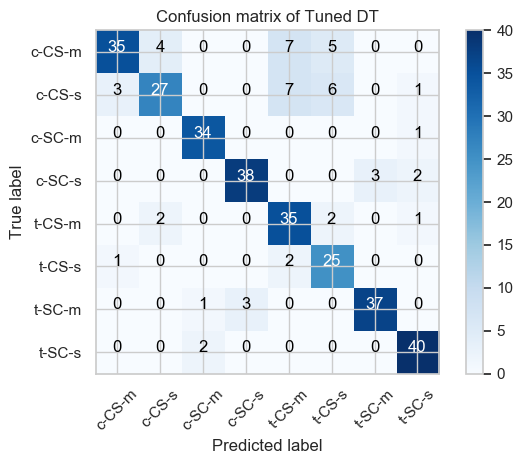

In [137]:
cnfdt_matrix = confusion_matrix(y_test, y_pred_DT,labels=['c-CS-m', 'c-CS-s','c-SC-m', 'c-SC-s','t-CS-m', 't-CS-s','t-SC-m', 't-SC-s'])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnfdt_matrix, classes=['c-CS-m', 'c-CS-s','c-SC-m', 'c-SC-s','t-CS-m', 't-CS-s','t-SC-m', 't-SC-s'],                      
                      title='Confusion matrix of Tuned DT')

### Summary of Accuracy Score

In [138]:
comparison_accuracy = pd.DataFrame(columns = ['KNN Classifier',  'Train Accuracy', 'Test Accuracy'])
comparison_accuracy.loc[len(comparison_accuracy)] = ['Baseline KNN',knn_clf_trainacc, knn_clf_testacc]
comparison_accuracy.loc[len(comparison_accuracy)] = ['Tuned KNN', gs_KNN.best_score_, cv_results_KNN.mean()]
comparison_accuracy.round(3)

,KNN Classifier,Train Accuracy,Test Accuracy
0,Baseline KNN,0.989,0.975
1,Tuned KNN,0.992,0.951


In [139]:
comparison_accuracy = pd.DataFrame(columns = ['Decision Tree Classifier',  'Train Accuracy', 'Test Accuracy'])
comparison_accuracy.loc[len(comparison_accuracy)] = ['Baseline DT',dt_clf_trainacc, dt_clf_testacc]
comparison_accuracy.loc[len(comparison_accuracy)] = ['Tuned DT', gs_DT.best_score_, cv_results_DT.mean()]
comparison_accuracy.round(3)

,Decision Tree Classifier,Train Accuracy,Test Accuracy
0,Baseline DT,1.000,0.833
1,Tuned DT,0.848,0.778
